In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print("There are {} rows and {} columns in the dataset.".format(df.shape[0],df.shape[1]))

There are 150 rows and 6 columns in the dataset.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.drop(['Id'],axis=1,inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

C:\Users\LIKHITA\anaconda3\Newfolder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

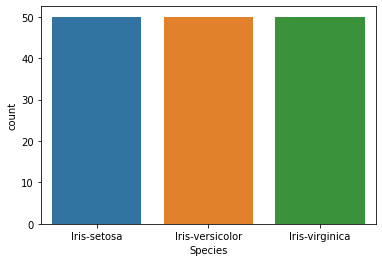

In [10]:
sns.countplot(df['Species'])

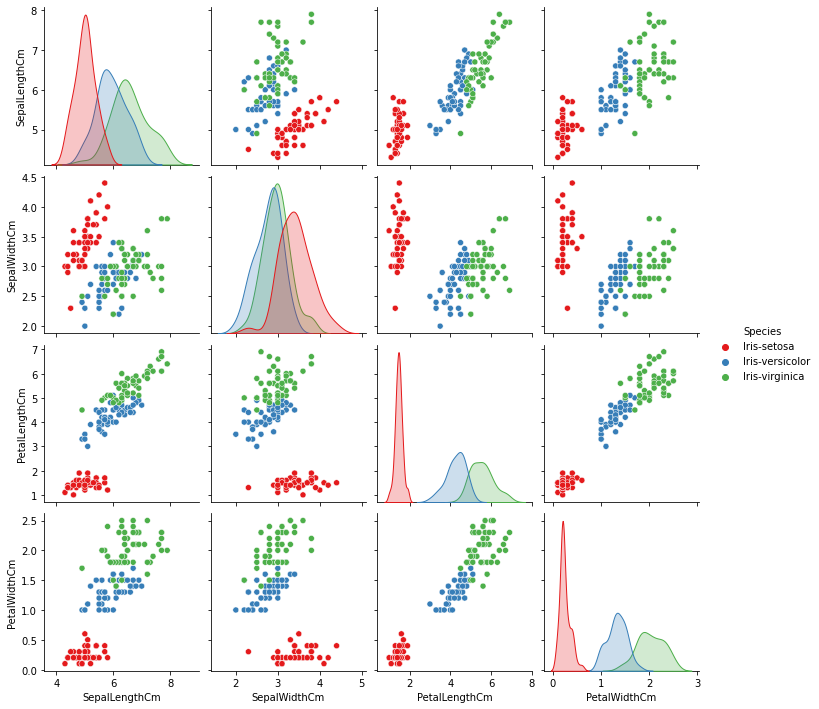

In [11]:
sns.pairplot(df,hue='Species',palette='Set1')

<AxesSubplot:title={'center':'Petal-Width(cm)'}, xlabel='Species', ylabel='PetalWidthCm'>

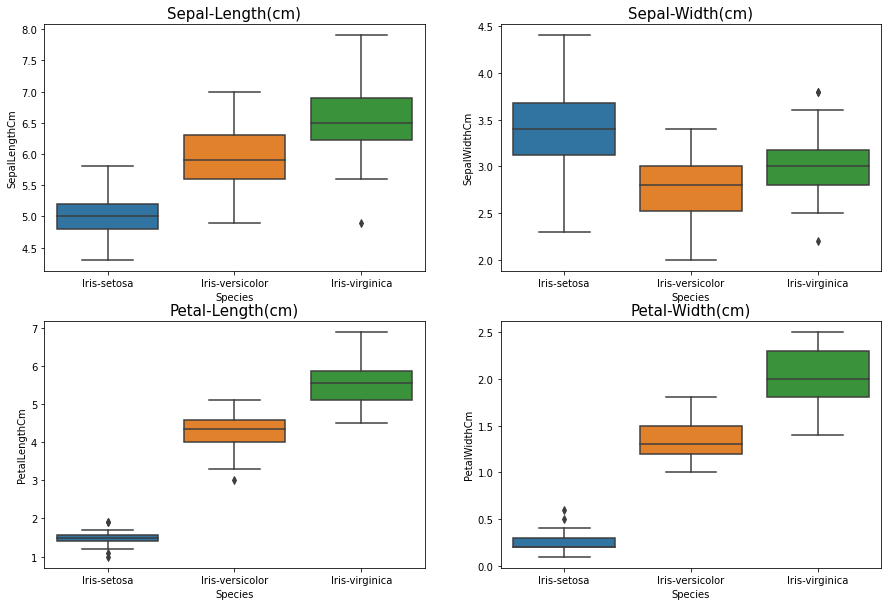

In [12]:
plt.subplots(figsize=(15, 10))

plt.subplot(2,2,1)
plt.title('Sepal-Length(cm)',fontsize=15)
sns.boxplot(x='Species',y='SepalLengthCm',data=df)


plt.subplot(2,2,2)
plt.title('Sepal-Width(cm)',fontsize=15)
sns.boxplot(x='Species',y='SepalWidthCm',data=df)

plt.subplot(2,2,3)
plt.title('Petal-Length(cm)',fontsize=15)
sns.boxplot(x='Species',y='PetalLengthCm',data=df)

plt.subplot(2,2,4)
plt.title('Petal-Width(cm)',fontsize=15)
sns.boxplot(x='Species',y='PetalWidthCm',data=df)

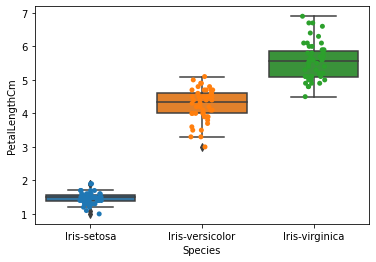

In [13]:
plot=sns.boxplot(x='Species',y='PetalLengthCm',data=df)
plot=sns.stripplot(x='Species',y='PetalLengthCm',data=df,jitter=True,edgecolor='gray')
plt.show()

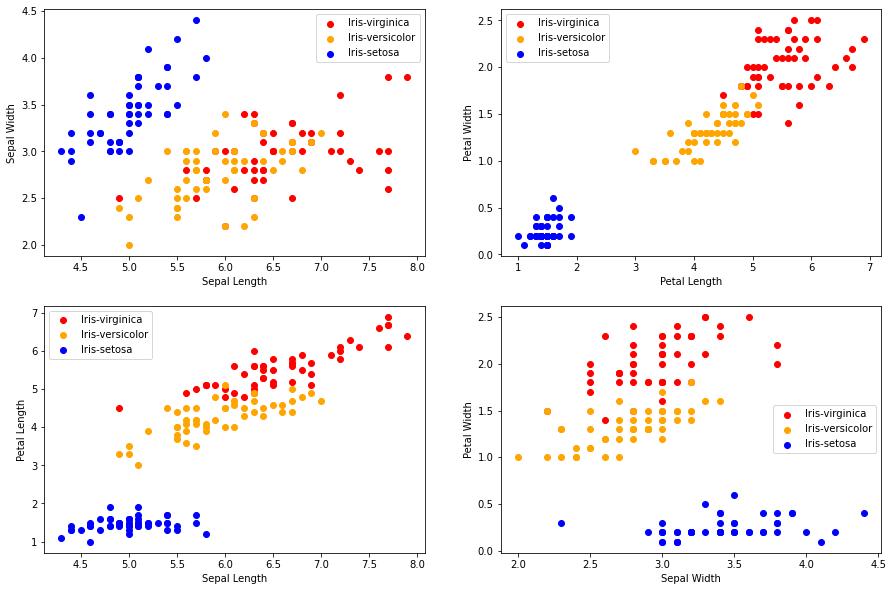

In [14]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
plt.subplots(figsize=(15,10))
plt.subplot(2,2,1)
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

plt.subplot(2,2,2)
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

plt.subplot(2,2,3)
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

plt.subplot(2,2,4)
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [15]:
le=LabelEncoder()
df['Encoded_Species']= le.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded_Species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [16]:
print(df['Encoded_Species'].value_counts())

0    50
1    50
2    50
Name: Encoded_Species, dtype: int64


In [17]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = df[['Encoded_Species']]

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
dec_tree=DecisionTreeClassifier()

In [22]:
dec_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [23]:
dec_tree.score(X_test,Y_test)*100

100.0

In [24]:
a = dec_tree.predict(X_test)
species = ['Setosa', 'Versicolor', 'Virginica']
predict_species = []

for i in a:
    predict_species.append(species[i])

print(f"Label Encoded Prediction of Species: {a} \n")
print(f"Species Names: {predict_species}")

Label Encoded Prediction of Species: [0 0 2 2 1 2 1 2 2 1 2 0 1 0 0 0 2 1 0 0 2 1 2 0 1 2 1 0 2 1] 

Species Names: ['Setosa', 'Setosa', 'Virginica', 'Virginica', 'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Virginica', 'Versicolor', 'Virginica', 'Setosa', 'Versicolor', 'Setosa', 'Setosa', 'Setosa', 'Virginica', 'Versicolor', 'Setosa', 'Setosa', 'Virginica', 'Versicolor', 'Virginica', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor']


<AxesSubplot:title={'center':'Confusion Matrix'}>

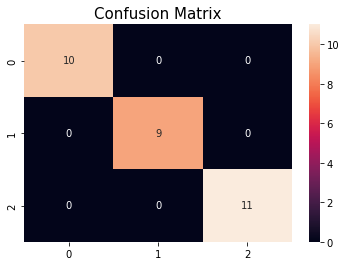

In [25]:
plt.title('Confusion Matrix',fontsize=15)
plt.xlabel('Predicted Value')
plt.ylabel('Real Value')

sns.heatmap(confusion_matrix(Y_test,a),annot=True)

[Text(0.36363636363636365, 0.9285714285714286, 'PetalLengthCm <= 2.6\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = Versicolor'),
 Text(0.2727272727272727, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = Setosa'),
 Text(0.45454545454545453, 0.7857142857142857, 'PetalLengthCm <= 4.85\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = Versicolor'),
 Text(0.18181818181818182, 0.6428571428571429, 'PetalWidthCm <= 1.7\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]\nclass = Versicolor'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = Versicolor'),
 Text(0.2727272727272727, 0.5, 'SepalWidthCm <= 3.0\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Versicolor'),
 Text(0.18181818181818182, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(0.36363636363636365, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Versicolor'),
 Text(0.7272727272

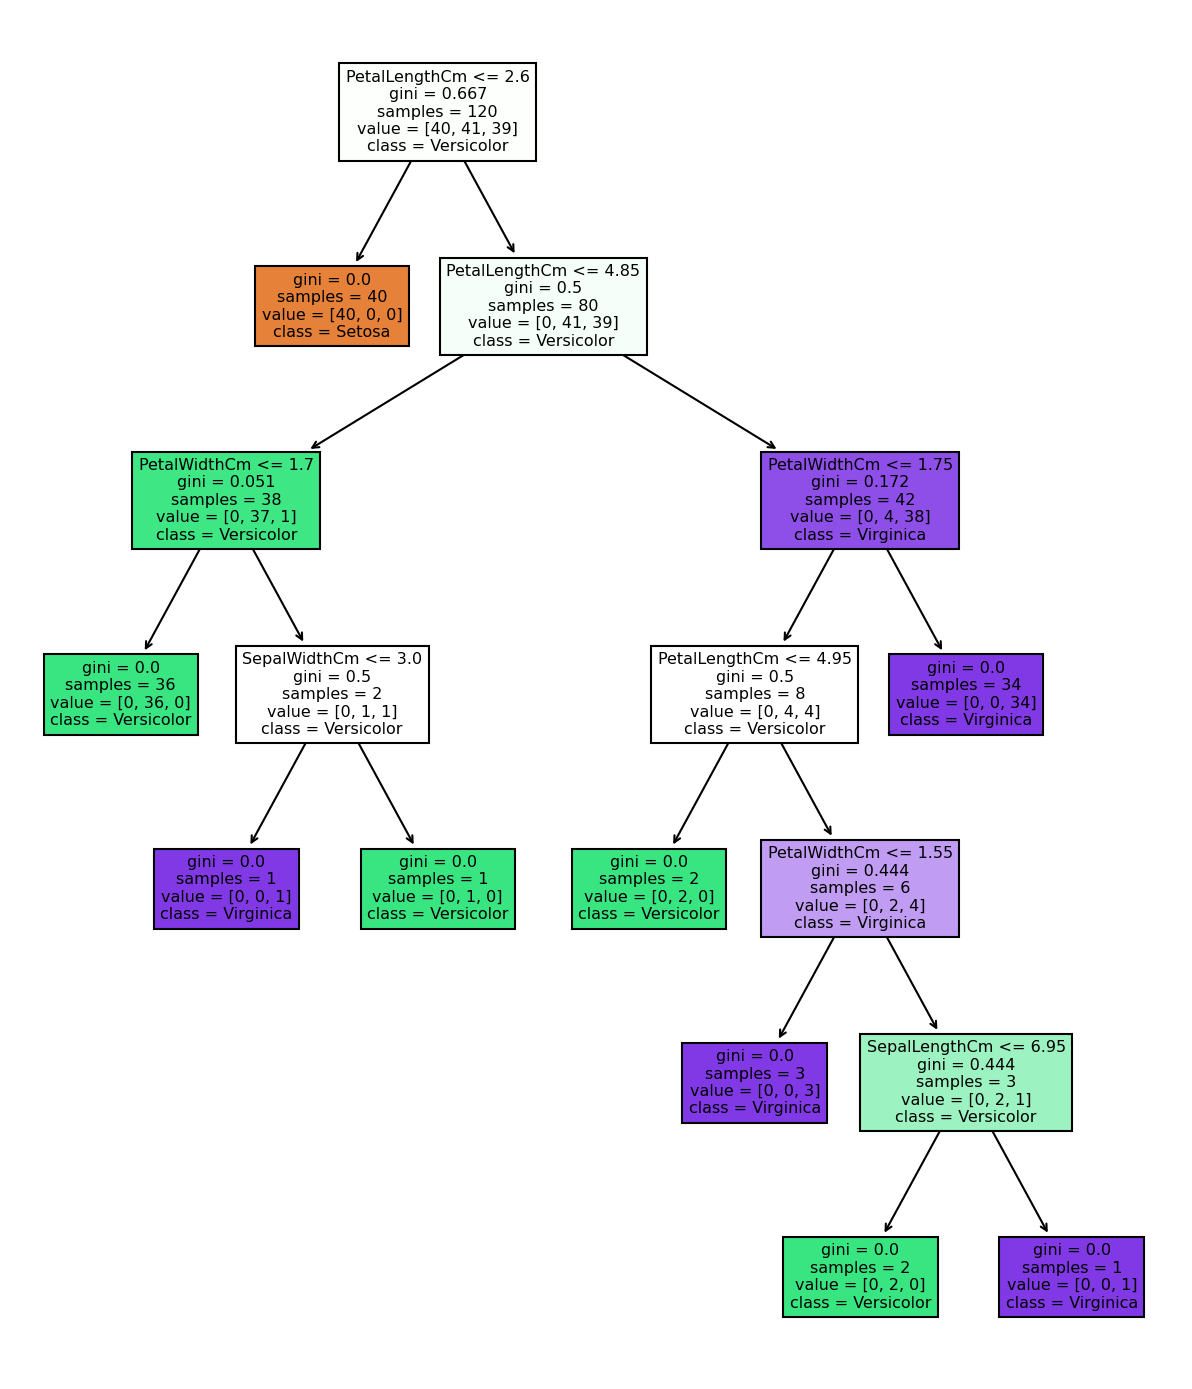

In [26]:
plt.figure(figsize=(10,12), dpi=150)
plot_tree(dec_tree, filled=True, feature_names=x.columns, class_names=['Setosa', 'Versicolor', 'Virginica'])